# IBM Data Science Professional Capestone Project

### The aim of this project is to solve a business problem brought up by a friend wanting to start up a Sub-Saharan African Restaurant in the London neighborhood. I will try to solve this problem by using location data gotten from the Foursqaure API

# Description of the Problem

- Introduction

  According to Wikipedia, London is the largest City in the UK and has been a major settlement for two millennia now. London is also considered one of the world's most important global cities in the world with attributes such as most visited, most infleuntial, most expensive and most vegetarian freindly city in the world. There is a saying in my culture which goes like this " L'homme c'est le ventre et le bas ventre". This just means a man cannot do without food and african food is known to be one of the best in the world. I can only recommend having a taste if you have never done by now


- Problem

  I have a friend living in Manchester who came some two months back to pay me a visit. He is into Food Business and is looking to open up a Sub-Saharan-African Restaurant in London neighborhood. Since he knows i am a data scientist, he asked to know which neighborhood will be the best suited for his Restaurant. The idea of this project is to locate the best Neighborhood in London to open a Restaurant for people of Sub-Saharan African descend. I will use the immigration data in London and Foursquare to evaluate and select the neighborhood suitable for my friend. This information could be of great help to Business people who may want to modify their Menu based on the preferences of the people living in that particular area.


# Description of the Data

- Origin of immigration data

  The data that would be used for this project is the immigration data taken from the London data store. This data presents Annual population survey based on diversity or country of birth. This data is published by the office for national statistics (ONS). The data set gives us information on the annual population survey of migrants, immigrants, british, UK born between 2004 and 2017. The population figures are measured in thousands. The other source of data was the venues in each Neighborhood in London collected from https://developer.foursquare.com/
  
  
  
- Variable Description

	* Year tells us the year in which the survey was conducted
    * Area_Code is the code of the area in which the survey was conducted
	* Area_Name is the name of the area in question
	* Broad_goup tells us if the people surveyed are British, from the European Union or Non-European Union
	* Detailed_group specifies where the people surveyed exactly came from. e.g from north america or south asia
	* Estimate provides the estimated total number of people surveyed in thousands


# A snapshot of the data necessary for the analysis can be seen below

In [17]:
# The code was removed by Watson Studio for sharing.

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI
735,2017,E09000001,City of London,Rest of the World,Sub-Saharan Africa,:,:
736,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,7
737,2017,E09000003,Barnet,Rest of the World,Sub-Saharan Africa,16,9
738,2017,E09000004,Bexley,Rest of the World,Sub-Saharan Africa,13,6
739,2017,E09000005,Brent,Rest of the World,Sub-Saharan Africa,37,11
740,2017,E09000006,Bromley,Rest of the World,Sub-Saharan Africa,8,6
741,2017,E09000007,Camden,Rest of the World,Sub-Saharan Africa,12,6
742,2017,E09000008,Croydon,Rest of the World,Sub-Saharan Africa,30,11
743,2017,E09000009,Ealing,Rest of the World,Sub-Saharan Africa,21,10
744,2017,E09000010,Enfield,Rest of the World,Sub-Saharan Africa,20,9


# I also made a time series Plot to see how the movement of sub saharan africans have changed from 2004 to 2017 in each Neighborhood in London


In [27]:
Area=New_ssa['Area_Name'].unique()
Lat_Long=[]
for x in Area:
    i=0
    address=x
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Lat_Long[:i]=[{'Area_Name':x, 'latitude':latitude,'longitude':longitude}]
    i=+1


# From the results above, we can see that some areas are showing some outliers and i will remove them here
dropcol = ['England','United Kingdom','London','Inner London','Outer London','South East']
New_ssa = ssa[~ssa.Area_Name.isin(dropcol)]
New_ssa
### Change the latitudes and longitudes into a dataframe
Lat_Long=pd.DataFrame(Lat_Long)

## Merge the sub-saharan data with the latitudes and longitudes while removing undesired estimate values
London_boro=pd.merge(New_ssa,Lat_Long, on=['Area_Name'])
London_boro=London_boro[~London_boro.Estimate.str.contains(':')]
London_boro=London_boro[~London_boro.Estimate.str.contains('z')]
London_boro=London_boro[~London_boro.Estimate.str.contains('c')]
London_boro = London_boro[~London_boro['Estimate'].isin(['.'])]
London_boro

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI,latitude,longitude
14,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,7,51.554117,0.150504
15,2016,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,21,7,51.554117,0.150504
16,2015,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,24,7,51.554117,0.150504
17,2014,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,22,7,51.554117,0.150504
18,2013,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,23,7,51.554117,0.150504
19,2012,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,21,6,51.554117,0.150504
20,2011,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,23,7,51.554117,0.150504
21,2010,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,23,6,51.554117,0.150504
22,2009,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,6,51.554117,0.150504
23,2008,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,17,5,51.554117,0.150504


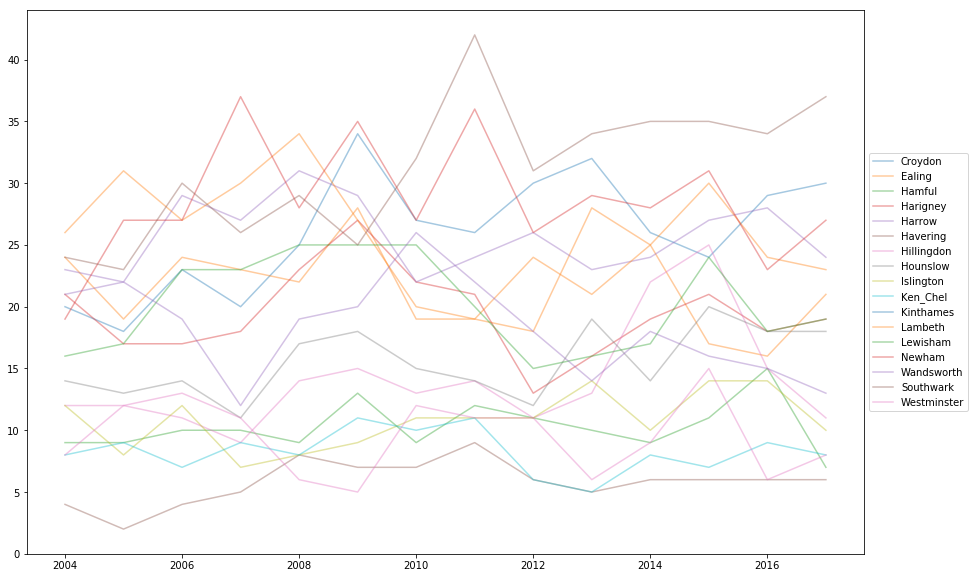

In [29]:
# Now make a time series plot of the development of the movement of sub saharan africans in the last years around the London neighborhood
London_boro['Estimate']=London_boro['Estimate'].astype(float)

London_Croydon=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Croydon')]
London_Ealing=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Ealing')]
London_Hamful=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hammersmith and Fulham')]
London_Haringey=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Haringey')]
London_Harrow=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Harrow')]
London_Havering=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Havering')]
London_Hillingdon=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hillingdon')]
London_Hounslow=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hounslow')]
London_Islington=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Islington')]
London_Ken_Chel=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Kensington and Chelsea')]
London_Kinthames=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Kingstone upon Thames')]
London_Lambeth=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Lambeth')]
London_Lewisham=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Lewisham')]
London_Newham=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Newham')]
London_Southwark=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Southwark')]
London_Wandsworth=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Wandsworth')]
London_Westminster=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Westminster')]



from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))

#plt.subplot(321)
plt.plot('Year','Estimate',data=London_Croydon, alpha=0.4,label='Croydon')
plt.plot('Year','Estimate',data=London_Ealing, alpha=0.4,label='Ealing')
plt.plot('Year','Estimate',data=London_Hamful, alpha=0.4,label='Hamful')
plt.plot('Year','Estimate',data=London_Haringey, alpha=0.4,label='Harigney')
plt.plot('Year','Estimate',data=London_Harrow, alpha=0.4,label='Harrow')
plt.plot('Year','Estimate',data=London_Havering, alpha=0.4,label='Havering')
plt.plot('Year','Estimate',data=London_Hillingdon, alpha=0.4,label='Hillingdon')
plt.plot('Year','Estimate',data=London_Hounslow, alpha=0.4,label='Hounslow')
plt.plot('Year','Estimate',data=London_Islington, alpha=0.4,label='Islington')
plt.plot('Year','Estimate',data=London_Ken_Chel, alpha=0.4,label='Ken_Chel')
plt.plot('Year','Estimate',data=London_Kinthames, alpha=0.4,label='Kinthames')
plt.plot('Year','Estimate',data=London_Lambeth, alpha=0.4,label='Lambeth')
plt.plot('Year','Estimate',data=London_Lewisham, alpha=0.4,label='Lewisham')
plt.plot('Year','Estimate',data=London_Newham, alpha=0.4,label='Newham')
plt.plot('Year','Estimate',data=London_Wandsworth, alpha=0.4,label='Wandsworth')
plt.plot('Year','Estimate',data=London_Southwark,alpha=0.4,label='Southwark')
plt.plot('Year','Estimate',data=London_Westminster, alpha=0.4,label='Westminster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


  From the diagram above, it can be seen that the majority of sub saharan africans have moved to Croydon and Ealing in the last years.

## The Euclidean distance method was used on the data to cluster the Restaurant locations by Neighborhood. This means the Restaurants will be classified by Neightborhood. In association with the population movement in the last years, i will then give a recommendation to my friend on where to open his Restaurant